# Entscheidungsbäume


_Dieses Notebook enthält Beispiele und Aufgaben für den Teil zu Entscheidungsbäumen._

# Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12



def image_path(fig_id):
    image_path = "images"
    if not os.path.isdir(image_path):
        os.mkdir(image_path)
    return os.path.join(image_path, fig_id)

def save_fig(plot, filename, tight_layout=True):
    print("Saving figure", filename)
    if tight_layout:
        plot.tight_layout()
    plot.savefig(image_path(filename) + ".png", format='png', dpi=300)

# Training and Visualisierung

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

for i in range(45, 55): 
    print("Sample: %i\tClass: %i\tData: %s" % (i, iris.target[i], iris.data[i,:]))

Sample: 45	Class: 0	Data: [4.8 3.  1.4 0.3]
Sample: 46	Class: 0	Data: [5.1 3.8 1.6 0.2]
Sample: 47	Class: 0	Data: [4.6 3.2 1.4 0.2]
Sample: 48	Class: 0	Data: [5.3 3.7 1.5 0.2]
Sample: 49	Class: 0	Data: [5.  3.3 1.4 0.2]
Sample: 50	Class: 1	Data: [7.  3.2 4.7 1.4]
Sample: 51	Class: 1	Data: [6.4 3.2 4.5 1.5]
Sample: 52	Class: 1	Data: [6.9 3.1 4.9 1.5]
Sample: 53	Class: 1	Data: [5.5 2.3 4.  1.3]
Sample: 54	Class: 1	Data: [6.5 2.8 4.6 1.5]


In [3]:
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

Saving figure iris_decision_tree_boundaries


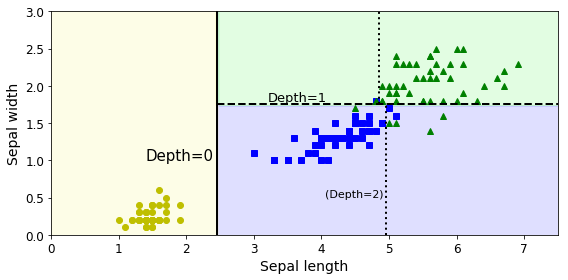

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Sepal length", fontsize=14)
        plt.ylabel("Sepal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y, axes=[0, 7.5, 0, 3.0])
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig(plt, "iris_decision_tree_boundaries")
plt.show()

Saving graph iris_decision_tree_graph


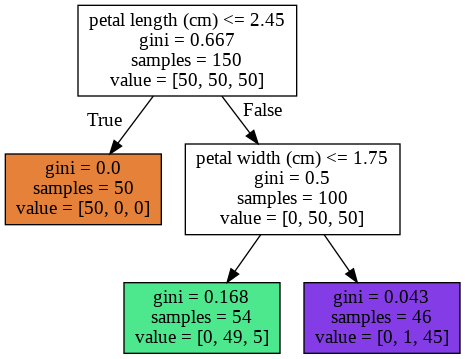

In [5]:
from graphviz import Source
from sklearn import tree
from IPython.display import Image

def create_graph(tree_clf, feature_names = None):
    return Source( tree.export_graphviz(tree_clf, out_file=None, filled=True, feature_names=feature_names ))

def show_graph(graph):
    return Image(graph.pipe(format='png'))

def save_graph(graph, filename):
    print("Saving graph", filename)
    with open(image_path(filename) + ".png",'wb') as f:
        f.write(graph.pipe(format='png'))
        
graph = create_graph(tree_clf, iris.feature_names[2:])        
save_graph(graph, "iris_decision_tree_graph")
show_graph(graph)        

# Vorhersage der Klasse und Klassenwahrscheinlichkeit

In [6]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [7]:
tree_clf.predict([[5, 1.5]])

array([1])

# Sensitivität auf einzelne Datenpunkte

In [8]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris-Versicolor flower

array([[4.8, 1.8]])

In [9]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=40,
            splitter='best')

Saving figure iris_decision_tree_instabilities


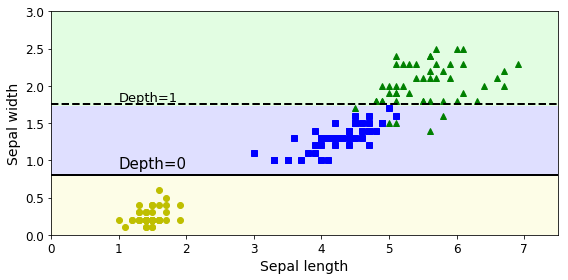

In [10]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig(plt, "iris_decision_tree_instabilities")
plt.show()

# Sensitivität auf Konfigurationsparameter

Saving figure min_samples_leaf_plot


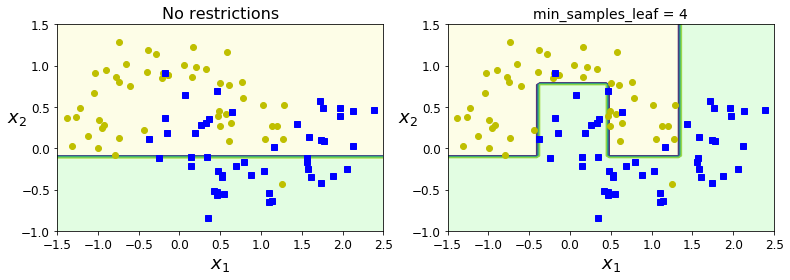

Saving graph halfmoon_decision_tree_graph


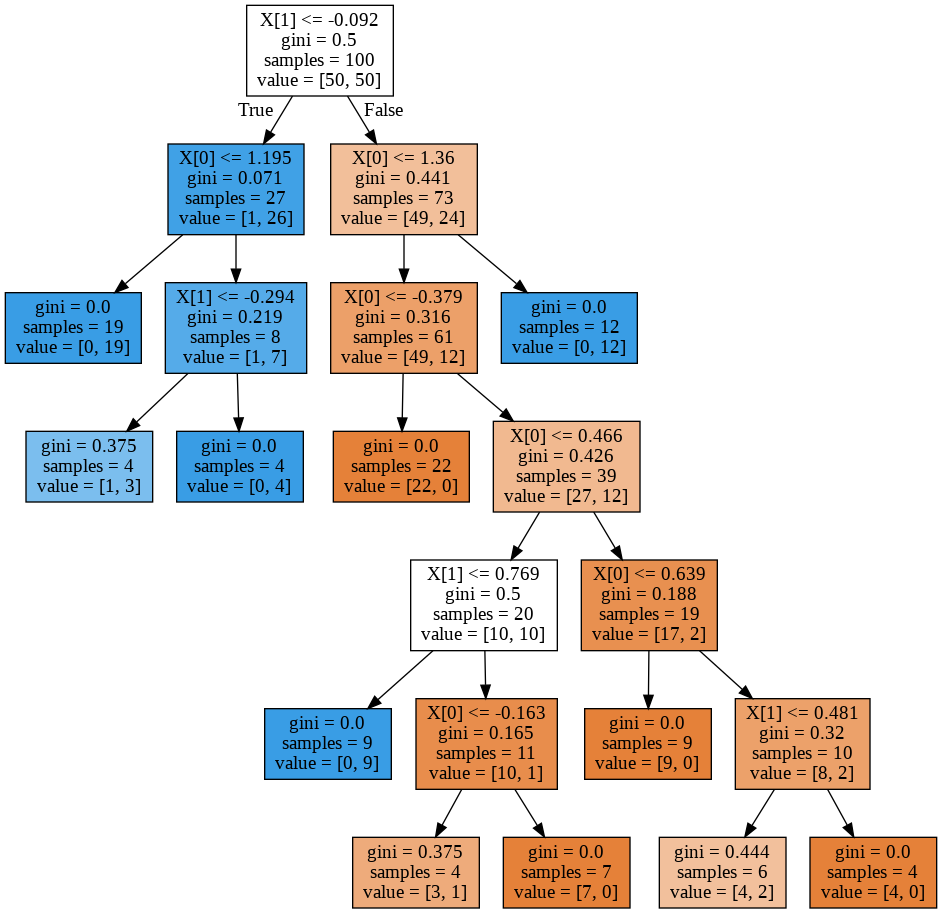

In [11]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42, max_depth=1)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

save_fig(plt, "min_samples_leaf_plot")
plt.show()

graph = create_graph(deep_tree_clf2, None)        
save_graph(graph, "halfmoon_decision_tree_graph")
show_graph(graph)  

# Datenvorverarbeitung

## Schwerliliendaten

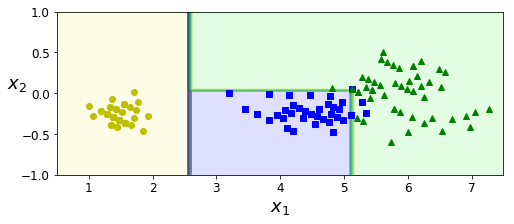

Saving graph rotated_decision_tree_graph


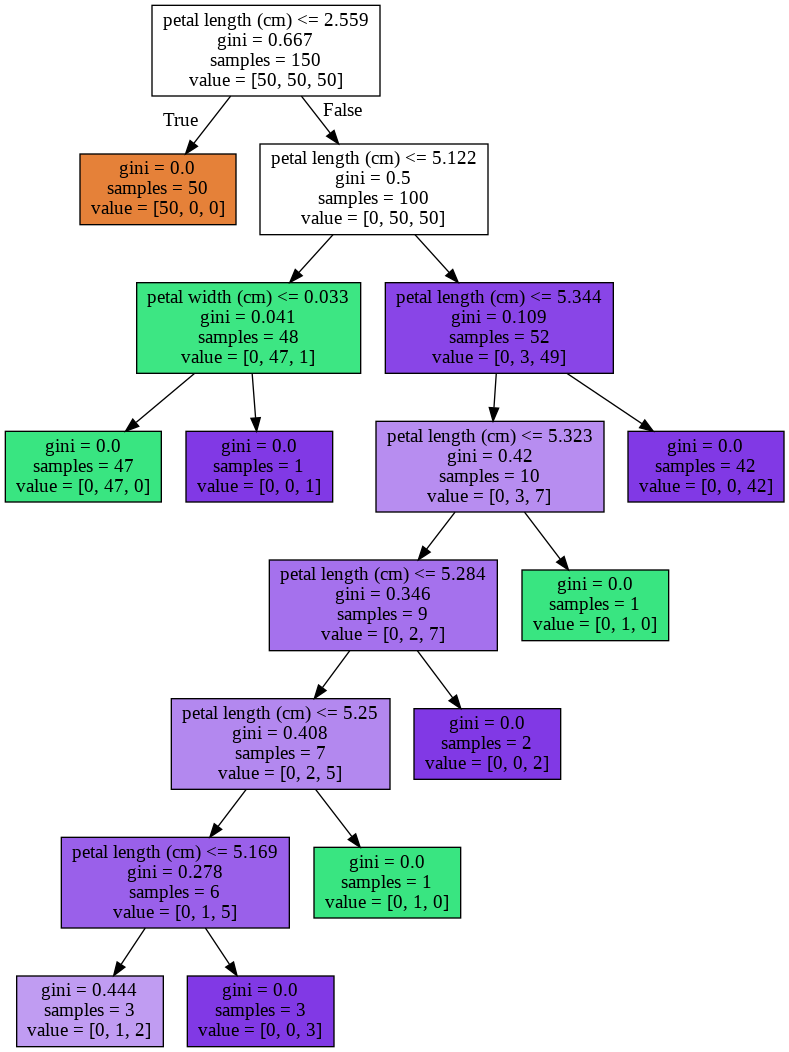

In [12]:
angle = np.pi / 180 * 20 # rotation by 20 degrees
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

graph = create_graph(tree_clf_r, iris.feature_names[2:])        
save_graph(graph, "rotated_decision_tree_graph")
show_graph(graph)

## Koordinatentransformation

Saving figure sensitivity_to_rotation_plot


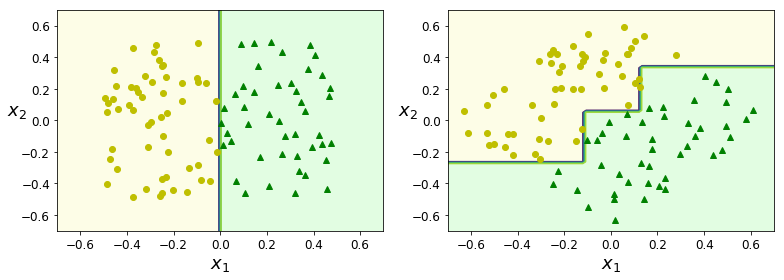

In [13]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

save_fig(plt, "sensitivity_to_rotation_plot")
plt.show()

# Praktische Übung:

## Training und Fine-Tuning eines Entscheidungsbaums

### 1. Erzeuge einen "Monddatensatz" mit den folgenden Parametern:
- n_samples = 1000
- noise = 0.4
- random state=42

Das Hinzufügen des Anfangszustands von `random_state=42` bewirkt, dass der Zufallsgenerator immer die gleiche Abfolge von Zahlen liefert.

In [14]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)

### 2. Visualisiere den Datensatz.

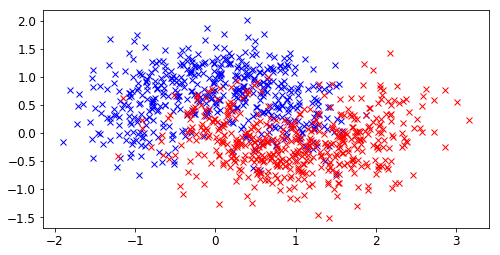

In [15]:
plt.figure(figsize=(8, 4))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bx")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "rx")
plt.show()



### 3. Teile den Datensatz mittels der Funktion `train_test_split()` in ein Trainings- und ein Testsample. Der Testdatensatz soll dabei 20% des gesamten Datensatz ausmachen.  .

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

### 4. Trainiere einen Entscheidungsbaum und teste / variiere die folgenden Parameter:
- max_depth 
- min_samples_split
- min_samples_leaf

Visualisiere den Output entsprechend:
- Schnitte im Parameterraum
- Entscheidungsbaum

Welcher Hyperparametersatz führt zum besten Ergebnis? Als Mass dient hierbei die `accuracy_score`:

```
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)
```


In [17]:
deep_tree_clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            splitter='best', random_state=42)
deep_tree_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred_train = deep_tree_clf.predict(X_train)
y_pred_test = deep_tree_clf.predict(X_test)

print('Genauigkeit Training:', accuracy_score(y_train, y_pred_train))
print('Genauigkeit Test:', accuracy_score(y_test, y_pred_test))



Genauigkeit Training: 0.97
Genauigkeit Test: 0.8266666666666667


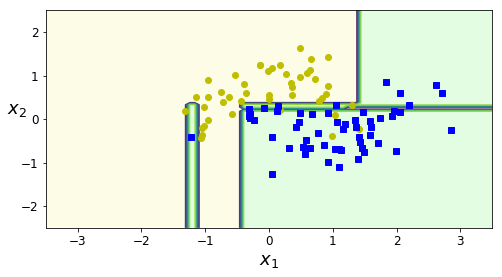

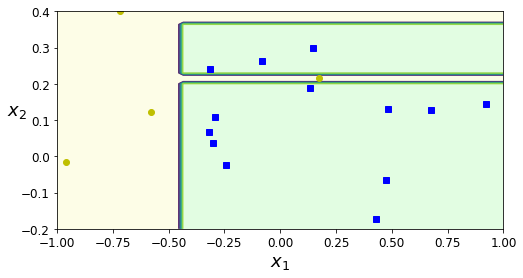

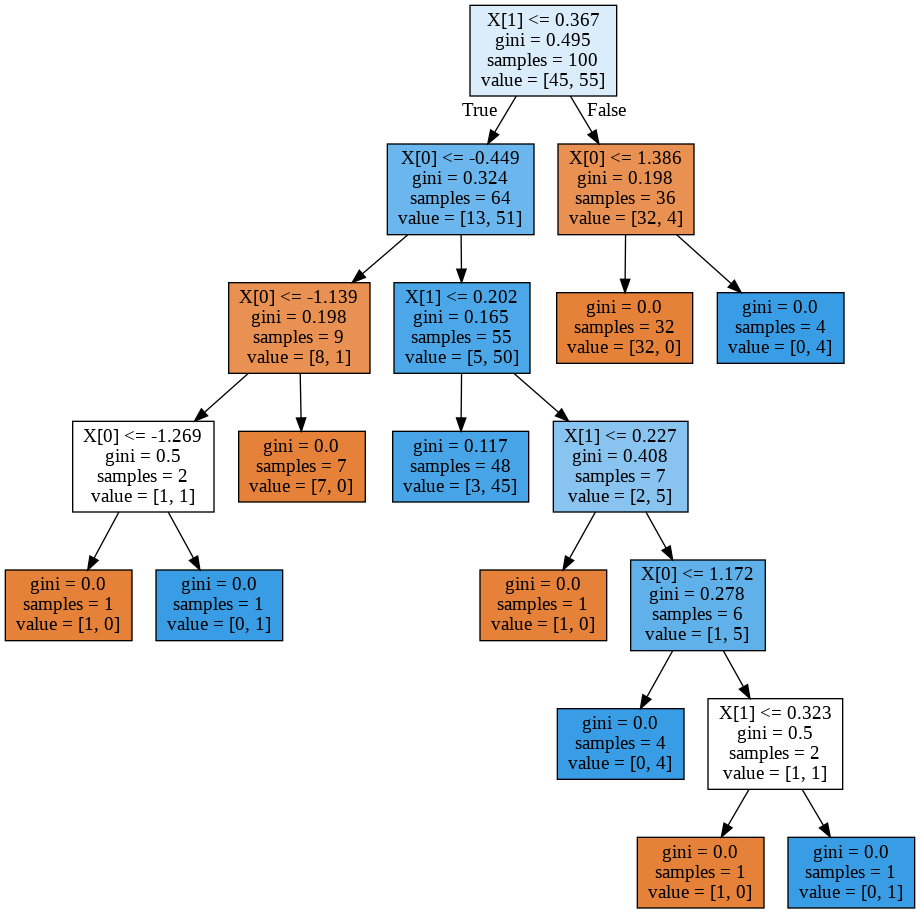

In [18]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(deep_tree_clf, X_train, y_train, axes=[-3.5, 3.5, -2.5, 2.5], iris=False)
plt.show()
plt.figure(figsize=(8, 4))
plot_decision_boundary(deep_tree_clf, X_train, y_train, axes=[-1.0, 1.0, -0.2, 0.4], iris=False)
plt.show()

graph = create_graph(deep_tree_clf)        
show_graph(graph)

# Praktische Übung:

## Automatisches Tuning des Entscheidungsbaums

Mit der Erfahrung aus der vorangegangenen Übung benutze das Tool `GridSearchCV`, um eine optimalen Satz an Hyperparametern für einen `DecisionTreeClassifier` zu finden.

Tipp: Teste verschiedene Werte für `max_leaf_nodes`.

In [23]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv = 3, iid = False)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    0.6s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       sc

In [24]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

Führe das Training mit dem besten Hyperparemetern durch und messe die Performance des Modells auf dem Testdatensatz durch. Du solltest eine Genauigkeit von etwa 85% to 87% erhalten.

In [25]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8455555555555555